# Árvore de Decisão
---

<img src="https://selecao-stg.letscode.com.br/favicon.png" style="position: absolute; top: 0.75rem; right: 2rem; width: 50px" />

### Roteiro da Aula

1. O que são Árvores de Decisão?
2. Como são feitas as decisões da árvore?
3. Entropia e Ganho de Informação
4. Aplicando o algoritmo da árvore de decisão
    - Visualizando a árvore
    - Obtendo métricas
5. Principais parâmetros da árvore

## Introdução

| Valor |  Horário  | Dia da Semana | Fraude |
|:-----:|:---------:|:------------:|:-------------:|
|  Alto |  Tarde    |    Domingo    |      10N      |
|  Alto |  Tarde    |    Quarta   |      6N      |
| Médio |  Madrugada    |    Domingo    |      3F      |
|  Alto | Madrugada |    Domingo    |      4F      |
| Baixo | Tarde |    -   |      7N      |
| Baixo |  Madrugada    |    Quarta   |      1F      |
| Baixo |  Madrugada    |    Domingo    |      8N      |
| Médio | Madrugada |    Quarta   |      3N      |
| Médio |  Tarde    |    -   |      5N      |
|  Alto | Madrugada |    Quarta   |      3F      |

> [Representação da Árvore no Whimsical](https://whimsical.com/arvore-de-decisao-Pz58QSEC8zqyt86Jc37JKs@2Ux7TurymMusFrQzCBeu)

Da mesma forma que uma uma regressão logística, uma árvore de decisão representa uma função que toma como entrada uma série de atributos/*features* e retorna uma **decisão**: um valor de saída único.

Uma boa analogia é com os manuais de conserto de eletrodomésticos dos anos 90: se uma situação A acontecer, você seguirá os passos descritos pelo caminho A+; caso contrário, seguirá pelo caminho A-; cada caminho levará a diferentes verificações e, consequentemente, a diferentes conclusões.  chegando à sua conclusão por meio da execução de uma série de testes, em geral de "verdadeiro-falso". De forma simples e direta, é um conjunto de regras *if-then-else*, sendo de fácil interpretação e implementação.

Olhando para o exemplo da imagem a seguir, podemos ilustrar essa sequência: a raiz e cada nó interno na árvore correspondem ao testes de um atributo de entrada do modelo; as folhas representam a decisão para esse caminho que foi percorrido. 

![tree_nos](https://s3-sa-east-1.amazonaws.com/lcpi/e0995123-6add-49a7-b541-af7b4a5f6cd5.jpg)

Porém, os testes que ocorrem nos atributos não são aleatórios: devem ser entendidos como funções de custo que buscam otimizar a homogeneidade de suas subpopulações. Queremos fazer com que cada subpopulação de cada nó esteja cada vez mais homogêneo possível, até chegar a folha, usando para isso uma estratégia de dividir para conquistar. 


### Entendendo o algoritmo de Árvore de Decisão por meio do dataset da Iris

<img src="https://miro.medium.com/max/384/0*VyeowlJuw5gXYRer." />
<img src="https://miro.medium.com/max/700/1*HMcpfu9zlpTurI2h2mugCQ.png" />
<img src="https://miro.medium.com/max/700/1*0iIETN4VtYOFke9MK1zi-g.png" />
<img src="https://miro.medium.com/max/700/1*fXpkqRhmvuJq7SvK7XTknw.png" />


Vamos tomar como base uma amostra da tabela do Titanic:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [24]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/5729687e-ae14-4978-8cd7-7ef18277813d.csv')

In [3]:
df_amostra = df.sample(15, random_state = 1)
df_amostra

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q


**Para pensar:** intuitivamente, entre Sex e Parch, qual é a coluna que mais discrimina sobrevivência? Por quê?

In [4]:
df_amostra.Survived.value_counts(True)

1    0.533333
0    0.466667
Name: Survived, dtype: float64

In [5]:
df_amostra[df_amostra.Parch == 0].Survived.value_counts(True).sort_index()

0    0.461538
1    0.538462
Name: Survived, dtype: float64

In [6]:
df_amostra[df_amostra.Parch == 2].Survived.value_counts(True).sort_index()

0    0.5
1    0.5
Name: Survived, dtype: float64

In [7]:
df_amostra[df_amostra.Sex == 'male'].Survived.value_counts(True).sort_index()

0    0.857143
1    0.142857
Name: Survived, dtype: float64

In [8]:
df_amostra[df_amostra.Sex == 'female'].Survived.value_counts(True).sort_index()

0    0.125
1    0.875
Name: Survived, dtype: float64

### Entropia

Em árvores de decisão, estamos buscando separar as instâncias de forma a obter o máximo de homogeneidade possível nas folhas, observando a variável resposta. Para chegar nesse ponto, olhamos para o conjunto de dados, escolhemos uma variável e um limiar e dividimos em dois subconjuntos baseados nisso. A partir daí podemos repetir o passo anterior para cada subconjunto, e para cada subconjunto gerado nos subconjuntos, fazendo um processo recursivo até que tenhamos nosso conjunto de dados perfeitamente separado.

Porém, precisamos escolher um critério para escolher uma variável e limiar para separar em dois subconjuntos. Para isso, usaremos um conceito da Teoria da Informação chamado Entropia, que mede a aleatoriedade de uma variável aleatória, sendo dada por:

$$H(\textrm{VA}) = -\sum_i{p_i \times \log_{2}{p_i}}$$


Exemplificando com uma moeda $M_1$ não viciada, podemos citar dois eventos: 

- 1, cara, com probabilidade $p_1 = 0.5$
- 2, coroa, com probabilidade $p_2 = 0.5$

Dessa forma, a entropia $H(M_1)$ é:

$$H(M_1) = -(0.5 \times \log_{2}{0.5} + 0.5 \times \log_{2}{0.5}) = 1$$

Logo, a entropia é máxima (casos binário), significando que essa variável possui um alto nível de aleatoriedade.

In [9]:
-(0.5 * np.log2(0.5) + 0.5*np.log2(0.5))

1.0

Exemplificando com uma moeda $M_2$ viciada, podemos citar dois eventos: 

- 1, cara, com probabilidade $p_1 = 0.1$
- 2, coroa, com probabilidade $p_2 = 0.9$


In [10]:
-(0.1*np.log2(0.1) + 0.9*np.log2(0.9))

0.4689955935892812

Podemos verificar esse pico ao pensar em moedas viciadas com probabilidades do evento 1 linearmente espaçadas entre 0 e 1:

[]

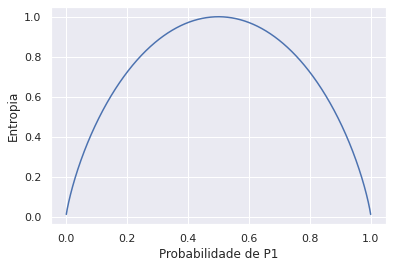

In [11]:
p1 = np.arange(0.001, 1, 0.001)
p2 = 1 - p1

entropia = -(p1*np.log2(p1) + p2*np.log2(p2))

plt.plot(p1, entropia)
plt.xlabel('Probabilidade de P1')
plt.ylabel('Entropia')

plt.plot()

$$H(\textrm{VA}) = -\sum_i{p_i \times \log_{2}{p_i}}$$


Exemplificando com uma moeda $M_1$ não viciada, podemos citar dois eventos: 

- 1, cara, com probabilidade $p_1 = 0.5$
- 2, coroa, com probabilidade $p_2 = 0.5$

Dessa forma, a entropia $H(M_1)$ é:

$$H(M_1) = -(0.5 \times \log_{2}{0.5} + 0.5 \times \log_{2}{0.5}) = 1$$

**Para pensar:** Qual que é a entropia da variável Survived?

In [12]:
df_amostra.Survived.value_counts(True)

1    0.533333
0    0.466667
Name: Survived, dtype: float64

In [13]:
p1 = 0.533333
p2 = 1 - p1

entropia = -(p1*np.log2(p1) + p2*np.log2(p2))
entropia

0.9967916961963406

**Para pensar:** Qual a entropia da variável Pclass?

In [14]:
df_amostra.Pclass.value_counts(True)

3    0.466667
1    0.266667
2    0.266667
Name: Pclass, dtype: float64

In [15]:
entropia = -(0.46*np.log(0.46) + 0.27*np.log(0.27) + 0.27*np.log(0.27))
entropia

1.0642432359607699

Formalizando matematicamente:
    
Em casos binários, no qual uma variável aleatória assume o valor 0 ou 1, podemos escrever a entropia como

$$H(\textrm{VA}) = B\left( \frac{p}{p + n}\right)= -\big[p \times \log_{2}{p} + (1 - p) \times \log_{2}(1 - p)\big]$$

O que queremos obter com a divisão do conjunto de dados são subconjuntos que diminuam ao máximo a aleatoriedade da variável resposta do conjunto original. Logo, para cada atributo do conjunto de dados, queremos calcular o **Ganho de Informação** que mede a redução na entropia das partições obtidas de acordo os valores desse atributo. Isso é dado pela diferença entre a entropia do conjunto de exemplos original e a soma ponderada da entropia das partições, sendo a construção da árvore orientada pelo objetivo de reduzir a entropia.

Ou seja, um atributo $A$ com $d$ valores possíveis para ele gera $S$ subconjuntos $S_1, S_2, ..., S_d$. Cada subconjunto $S_k$ possui $p_k$ exemplos positivos e $n_k$ exemplos negativos, nos dando uma entropia de $B\left( \frac{p_k}{p_k + n_k}\right)$. Ponderando pela quantidade de exemplos dos subconjuntos, temos um conteúdo de informação esperado do atributo $A_i$ de

$$E(A_i) = \sum_i{\frac{p_k + n_k}{p + k} B\left( \frac{p_k}{p_k + n_k}\right)}$$.

Dessa forma, o Ganho de Informação do atributo $A_i$ é a redução na entropia do estado anterior para o estado posterior, na forma

$$\textrm{Ganho}(A_i) =  B\left( \frac{p}{p + n}\right) - E(A_i)$$






---

### Em resumo...

#### O que é uma Árvore de Decisão?

- Um algoritmo que, a partir da definição de algumas regras, direciona a resposta de uma nova instância para alguma folha específica que trará a previsão.
- As regras são criadas de forma a ter nós e folhas cada vez "mais puros" em relacão a variável resposta.
- Algoritmo recursivo.

#### O que é entropia?

- Grau de desordem.
- Nível de aleatoriedade.
- Quanto maior a entropia, mais aleatório.

#### O que é ganho de informação?

- É a diminuição da entropia do cenário pré-quebra para o pós quebra.

---

### Aplicando o algoritmo de Árvore de Decisão no dataset do Titanic (`Pclass` e `Sex`)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
df['Sex'] = df['Sex'].map({
    'male': 0,
    'female': 1
})

In [26]:
X = df[['Pclass', 'Sex']]
y = df['Survived']

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, y)

y_proba = tree.predict_proba(X)
y_pred = tree.predict(X)

In [19]:
y_pred[:5]

array([0, 1, 0, 1, 0])

In [20]:
y[:5].values

array([0, 1, 1, 1, 0])

#### Importância das variáveis nas decisões da árvore

In [12]:
tree.feature_importances_

array([0.30808001, 0.69191999])

#### Visualizando a árvore

In [41]:
from sklearn.tree import plot_tree

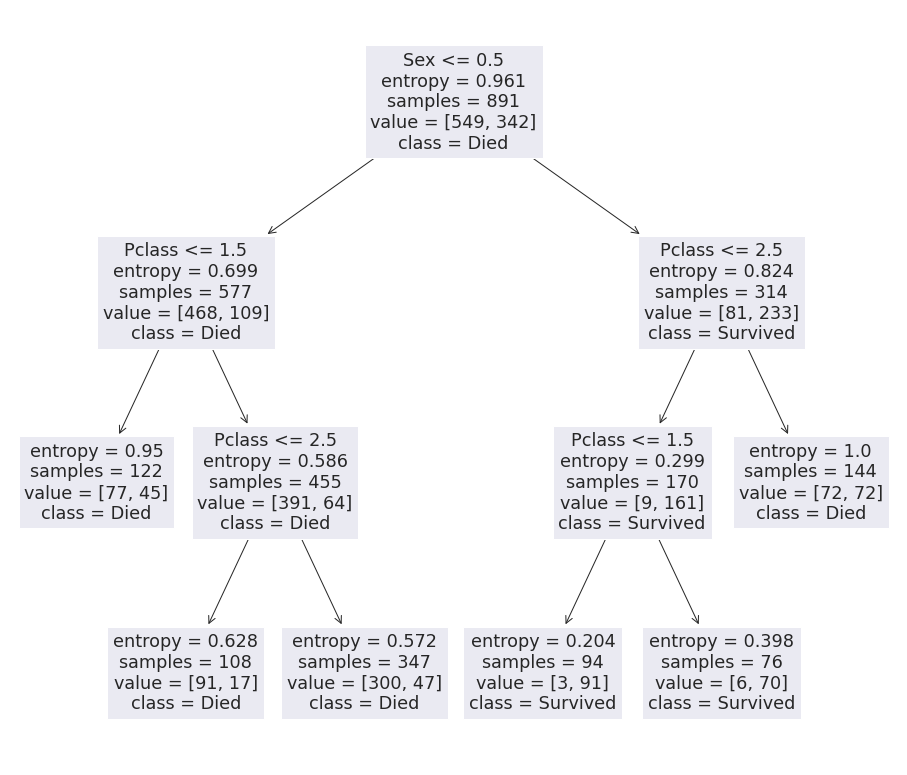

In [14]:
plt.figure(figsize=(16,14))
plot_tree(tree, feature_names=X.columns, class_names=['Died', 'Survived'])
plt.show()

In [31]:
tree.predict([[1, 0], [2, 0], [3, 0], [1, 1], [2, 1], [3, 1]])

array([0, 0, 0, 1, 1, 0])

#### Calculando as métricas do modelo

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

In [33]:
accuracy_score(y, y_pred)

0.7867564534231201

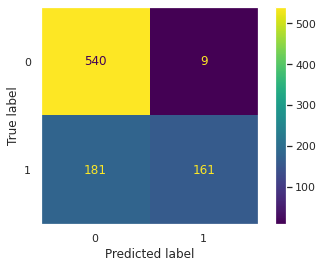

In [35]:
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.grid(False)

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       549
           1       0.95      0.47      0.63       342

    accuracy                           0.79       891
   macro avg       0.85      0.73      0.74       891
weighted avg       0.82      0.79      0.77       891



### Modelo com `Fare` e `Sex`

In [37]:
X = df[['Fare', 'Sex']]
y = df['Survived']

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, y)

y_proba = tree.predict_proba(X)
y_pred = tree.predict(X)

In [38]:
y_pred[:5]

array([0, 1, 1, 1, 0])

In [40]:
y[:5].values

array([0, 1, 1, 1, 0])

#### Visualizando a árvore

In [42]:
X.columns

Index(['Fare', 'Sex'], dtype='object')

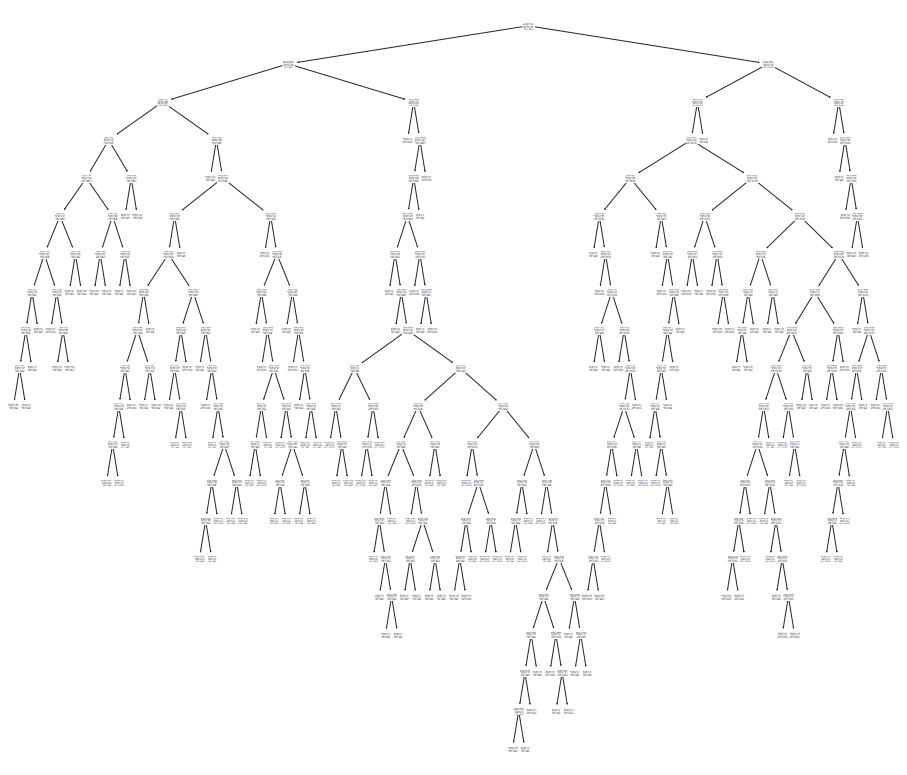

In [45]:
plt.figure(figsize=(16,14))
plot_tree(tree, feature_names=X.columns, class_names=['Died', 'Survived'])
plt.show()

#### Analisando a região de decisão do modelo

> [Como plotar a região de decisão de um algoritmo de ML?](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

In [46]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

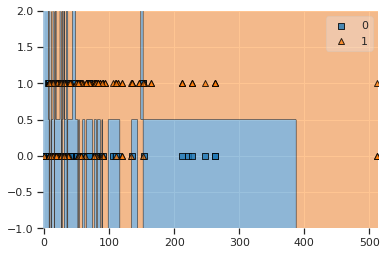

In [48]:
plot_decision_regions(X.values, y.values, clf=tree)

In [49]:
accuracy_score(y, y_pred)

0.9023569023569024

In [50]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       549
           1       0.93      0.80      0.86       342

    accuracy                           0.90       891
   macro avg       0.91      0.88      0.89       891
weighted avg       0.90      0.90      0.90       891



### Atributos mais importantes
- max_depth
- min_samples_split
- min_samples_leaf

#### Considerando a variável idade (`Fare`, `Sex`, `Age`)

In [53]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [54]:
X = df[['Fare', 'Sex', 'Age']]
y = df['Survived']

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, y)

y_proba = tree.predict_proba(X)
y_pred = tree.predict(X)

[Text(202.11657822118445, 213.55714285714285, 'Sex <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Died'),
 Text(124.29743154319677, 205.79142857142858, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]\nclass = Died'),
 Text(89.18998089577585, 198.0257142857143, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]\nclass = Died'),
 Text(69.57529187009128, 190.26, 'Fare <= 18.769\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]\nclass = Survived'),
 Text(67.30112502653364, 182.4942857142857, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = Survived'),
 Text(71.8494587136489, 182.4942857142857, 'Fare <= 19.656\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = Survived'),
 Text(69.57529187009128, 174.72857142857143, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Died'),
 Text(74.12362555720654, 174.72857142857143, 'Age <= 2.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Survived'),
 Text(71.8494587136489, 166.962857

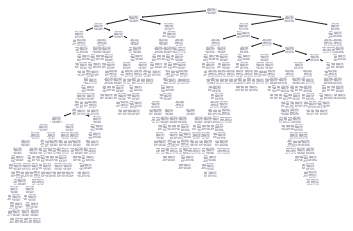

In [55]:
plt.figure(figsize=(16, 14))
plot_tree(tree, feature_names=X.columns, class_names=['Died', 'Survived'])
plt.plot()

#### Calculando Métricas

- Acurácia
- Matriz de Confusão
- ROC AUC

In [56]:
accuracy_score(y, y_pred)

0.9775533108866442

In [57]:
confusion_matrix(y, y_pred)

array([[546,   3],
       [ 17, 325]])

In [59]:
roc_auc_score(y, y_proba[:,1])

0.9988069749358217

#### Divisão Treino/Teste (e visualizando um problema)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
# Criando a árvore de decisão
tree = DecisionTreeClassifier(criterion='entropy')

# Treinando a árvore de decisão passando os dados de treino
tree.fit(X_train, y_train)

# Fazendo predições dos dados de treino
y_proba_train = tree.predict_proba(X_train)
y_pred_train = tree.predict(X_train)

# Fazendo predições dos dados de teste
y_proba_test = tree.predict_proba(X_test)
y_pred_test = tree.predict(X_test)

In [65]:
print('Acurácia (treino):', accuracy_score(y_train, y_pred_train))
print('Acurácia (teste):', accuracy_score(y_test, y_pred_test))

Acurácia (treino): 0.9935794542536116
Acurácia (teste): 0.7276119402985075


In [67]:
print('Acurácia (treino):', roc_auc_score(y_train, y_proba_train[:,1]))
print('Acurácia (teste):', roc_auc_score(y_test, y_proba_test[:,1]))

Acurácia (treino): 0.9998966492602263
Acurácia (teste): 0.6991790692180486


In [68]:
# Treino
confusion_matrix(y_train, y_pred_train)

array([[382,   1],
       [  3, 237]])

In [69]:
# Teste
confusion_matrix(y_test, y_pred_test)

array([[134,  32],
       [ 41,  61]])

### Parâmetros importantes

- `max_depth`: profundidade máxima da árvore

In [82]:
# Criando a árvore de decisão (com menos profundidade: igual a 3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Treinando a árvore de decisão passando os dados de treino
tree.fit(X_train, y_train)

# Fazendo predições dos dados de treino
y_proba_train = tree.predict_proba(X_train)
y_pred_train = tree.predict(X_train)

# Fazendo predições dos dados de teste
y_proba_test = tree.predict_proba(X_test)
y_pred_test = tree.predict(X_test)

In [79]:
print('Acurácia (treino):', accuracy_score(y_train, y_pred_train))
print('Acurácia (teste):', accuracy_score(y_test, y_pred_test))

Acurácia (treino): 0.7897271268057785
Acurácia (teste): 0.7985074626865671


In [80]:
print('AUC (treino):', roc_auc_score(y_train, y_proba_train[:,1]))
print('AUC (teste):', roc_auc_score(y_test, y_proba_test[:,1]))

AUC (treino): 0.8453492167101827
AUC (teste): 0.833982990786676


[]

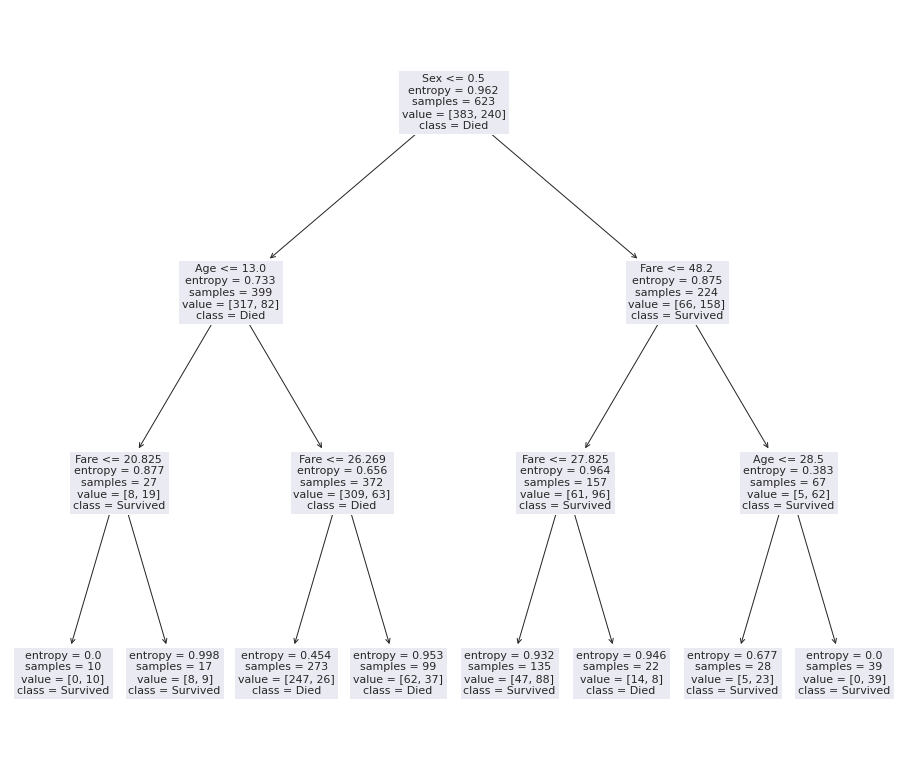

In [81]:
plt.figure(figsize=(16,14))
plot_tree(tree, feature_names=X_train.columns, class_names=['Died', 'Survived'])
plt.plot()

### Por que árvores de decisão são tão populares?

Como pode-se ver, árvores de decisões são conceitualmente simples, porém poderosas. Sua popularidade é, principalmente, devido a suas características singulares:

1. Fácil explicabilidade e interpretação, já que podemos facilmente visualizá-las (quando não são muito profundas).
2. Requerem pouco esforço na preparação dos dados, métodos baseados em árvores normalmente não requerem normalização dos dados. Além disso, conseguem lidar com valores faltantes, categóricos e numéricos.
3. Complexidade logarítmica na etapa de predição.
4. São capazes de lidar com problemas com múltiplos rótulos.

### Nem tudo são flores!

Árvores de decisão possuem alguns probleminhas que podem degradar seu poder preditivo, são eles:

1. Árvore crescida até sua profundidade máxima pode decorar o conjunto de treino (o temido overfitting), o que pode degradar seu poder preditivo quando aplicado a novos dados. Isso pode ser mitigado "podando" a árvore de decisão ao atribuir uma profundidade máxima ou uma quantidade máxima de folhas.
2. São modelos instáveis (alta variância), pequena variações nos dados de treino podem resultar em árvores completamente distintas. Isso pode ser evitado ao treinarmos várias árvores distintas e agregar suas predições (que veremos nas próximas aulas).
3. Como vimos, o algoritmo de construção da árvore de decisão é guloso, ou seja, não garante a construção da melhor estrutura para o dados de treino em questão. Esse problema também pode ser mitigado ao treinarmos várias árvores distintas e agregar suas predições.

### Exercício

Aplique a árvore de decisão no dataset da iris. Explore o parâmetro `max_depth` e visualize a árvore.